# 0.0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import inflection

from bs4 import BeautifulSoup
import requests
import time
from unidecode import unidecode

from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from webdriver_manager.firefox import GeckoDriverManager

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    
    pd.options.display.float_format = '{:20.3f}'.format
    pd.set_option('display.max_rows', 200)
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    sns.set()

In [3]:
jupyter_settings()

## 0.2. Import Data

In [4]:
# Abertura do arquivo de dados principal
df = pd.read_csv('/home/tcbm/projs/case_geofusion/data/DesafioEstagioMachineLearning.csv')

In [5]:
df.head(10)

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,...,0,145,715,1242,1093,758,92,304,2501.000,932515.000
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,...,0,0,82,506,2040,2490,827,2506,931.000,588833.000
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,...,0,96,404,652,644,522,77,254,2391.000,874200.000
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,...,114,178,393,517,945,584,137,286,3727.000,912226.000
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,...,0,0,1089,2821,5110,5422,1073,3261,1380.000,553020.000
5,3304557034,Andaraí,Rio de Janeiro,RJ,40476,3528,1703,2564,2753,5993,...,290,1245,3647,3321,3289,2419,304,1059,3443.000,1204467.000
6,3304557082,Anil,Rio de Janeiro,RJ,24855,2427,1227,1777,1804,3730,...,355,759,1771,1863,1902,1155,326,424,NaN,1092081.000
7,3304557115,Bancários,Rio de Janeiro,RJ,12864,1532,670,963,1076,2083,...,0,82,491,750,1313,1177,172,352,1962.000,808554.000
8,3304557099,Bangu,Rio de Janeiro,RJ,249987,32651,15949,20926,20146,37750,...,0,496,5246,13274,24363,22447,4564,11109,1550.000,35465.000
9,3304557131,Barra Da Tijuca,Rio de Janeiro,RJ,139761,13038,5225,7432,8627,21914,...,13408,11668,14820,5205,3437,1841,0,3897,18084.000,2915612.000


# 1.0. Data Description

In [6]:
# Copiando o dataframe atualizado para a sessão 1
df1 = df.copy()

## 1.1. Change Columns Names

In [7]:
# Selecionando os nomes das colunas antigas como uma lista
old_columns = df1.columns.to_list()

# Alterando o nome das colunas para underscore
new_columns = list(map(lambda x: inflection.underscore(x), old_columns))

# Inserindo o novo nome no DataFrame
df1.columns = new_columns

In [8]:
df1.columns

Index(['codigo', 'nome', 'cidade', 'estado', 'população', 'pop_ate9',
       'pop_de10a14', 'pop_de15a19', 'pop_de20a24', 'pop_de25a34',
       'pop_de35a49', 'pop_de50a59', 'pop_mais_de60', 'domicilios_a1',
       'domicilios_a2', 'domicilios_b1', 'domicilios_b2', 'domicilios_c1',
       'domicilios_c2', 'domicilios_d', 'domicilios_e', 'renda_media',
       'faturamento'],
      dtype='object')

## 1.1. Data Dimension

In [9]:
print(f'Número de linhas: {df1.shape[0]}')
print(f'Número de colunas: {df1.shape[1]}')

Número de linhas: 160
Número de colunas: 23


## 1.2. Data Dypes

Todos os dtypes estão sendo usados devidamente. Não será preciso fazer alterações.

In [10]:
df1.dtypes

codigo             int64
nome              object
cidade            object
estado            object
população          int64
pop_ate9           int64
pop_de10a14        int64
pop_de15a19        int64
pop_de20a24        int64
pop_de25a34        int64
pop_de35a49        int64
pop_de50a59        int64
pop_mais_de60      int64
domicilios_a1      int64
domicilios_a2      int64
domicilios_b1      int64
domicilios_b2      int64
domicilios_c1      int64
domicilios_c2      int64
domicilios_d       int64
domicilios_e       int64
renda_media      float64
faturamento      float64
dtype: object

## 1.3. Check NA

A renda_media possui alguns dados faltates. Mais para frente deveremos tratá-lo.

In [11]:
df1.isnull().sum()

codigo           0
nome             0
cidade           0
estado           0
população        0
pop_ate9         0
pop_de10a14      0
pop_de15a19      0
pop_de20a24      0
pop_de25a34      0
pop_de35a49      0
pop_de50a59      0
pop_mais_de60    0
domicilios_a1    0
domicilios_a2    0
domicilios_b1    0
domicilios_b2    0
domicilios_c1    0
domicilios_c2    0
domicilios_d     0
domicilios_e     0
renda_media      6
faturamento      0
dtype: int64

## 1.4. Descriptive Statistics

In [12]:
num_attributes = df1.select_dtypes(exclude='object')
cat_attributes = df1.select_dtypes(include='object')

### 1.4.1. Numerical Attributes

In [13]:
# Central Tendency - mean, meadina 
ct_1 = pd.DataFrame(num_attributes.apply(lambda x: x.mean())).T
ct_2 = pd.DataFrame(num_attributes.apply(lambda x: x.median())).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T 
d2 = pd.DataFrame(num_attributes.apply(min)).T 
d3 = pd.DataFrame(num_attributes.apply(max)).T 
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T 
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T 
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T 

# Concat
m = pd.concat([d2, d3, d4, ct_1, ct_2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,codigo,3304557001.000,3304557160.000,159.000,3304557080.500,3304557080.500,46.187,0.000,-1.200
1,população,173.000,667603.000,667430.000,42654.350,26076.000,64061.813,6.430,56.988
2,pop_ate9,33.000,122578.000,122545.000,5329.062,3111.500,10782.346,8.455,87.995
3,pop_de10a14,13.000,55935.000,55922.000,2484.444,1434.000,4933.338,8.385,86.770
4,pop_de15a19,22.000,62342.000,62320.000,3272.156,2015.000,5734.153,7.402,71.039
5,pop_de20a24,17.000,60567.000,60550.000,3349.381,2142.500,5584.360,7.254,69.288
6,pop_de25a34,28.000,86116.000,86088.000,6584.475,4170.500,9021.571,5.159,38.472
7,pop_de35a49,38.000,105316.000,105278.000,8826.862,5657.000,11500.169,4.691,32.096
8,pop_de50a59,10.000,83341.000,83331.000,5332.262,3371.500,7961.266,6.496,57.989
9,pop_mais_de60,12.000,91408.000,91396.000,7475.706,4575.500,10226.200,4.725,30.970


### 1.4.2. Categorical Attributes

In [14]:
cat_attributes.apply(lambda x: x.unique().shape[0])

nome      160
cidade      1
estado      1
dtype: int64

In [15]:
cat_attributes['cidade'].value_counts()

Rio de Janeiro    160
Name: cidade, dtype: int64

São três as variáveis categóricas do conjunto de dados:
- **nome** -> Atribui o nome do bairro. Cada linha é um bairro diferente;
- **cidade** e **estado** -> Todas as entradas são da cidade do Rio de Janeiro, logo essas duas variáveis podem ser descartadas.

# 2.0. Feature Engineering

In [16]:
df2 = df1.copy()

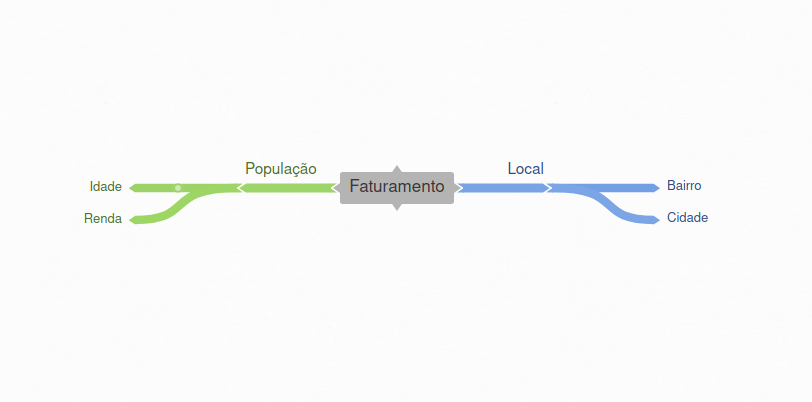

## 2.1. Scrap -> IDH - Área - Subprefeitura

### 2.1.1. Coletando os dados

In [17]:
# Pegando a url com o link dos bairros da cidade no wikipedia
url = 'https://pt.wikipedia.org/wiki/Regi%C3%B5es_administrativas_da_cidade_do_Rio_de_Janeiro'

# fazendo a request
page=requests.get(url)

# criando o soup
soup_url_bairros = BeautifulSoup(page.text, 'html.parser')

In [18]:
# determinando a url
url = "https://pt.wikipedia.org/wiki/Regi%C3%B5es_administrativas_da_cidade_do_Rio_de_Janeiro"

# escolhendo o navegador
option = Options()
option.headless = False
driver = webdriver.Firefox(options=option, executable_path=GeckoDriverManager().install() )

# abrindo a url
driver.get(url)

# sleed de 1 segundo
time.sleep(1)

# clicando no elemento ordenador da tabela
driver.find_element_by_xpath("//div[@class='mw-parser-output']//table//thead//tr//th").click()

# coletando o html da tabela
element = driver.find_element_by_xpath("//div[@class='mw-parser-output']//table[@class='sortable wikitable wm-collapse jquery-tablesorter']//tbody")
html_content = element.get_attribute('outerHTML')

time.sleep(2)

# saindo do navegador
driver.quit()



====== WebDriver manager ======
Current firefox version is 86.0
Get LATEST driver version for 86.0
Driver [/home/tcbm/.wdm/drivers/geckodriver/linux64/v0.29.1/geckodriver] found in cache


In [19]:
soup = BeautifulSoup(html_content, 'html.parser')

In [20]:
teste_dict = {}

# lista de links das cidades
list_links = []

# lista de linhas
linhas = soup.find_all('tr')

# passando por cada linha
for key, value in enumerate(linhas):    
    list_infos = [] # lista de valores
    
    #lista de colunas da linha
    setor = value.find_all('td')
    
    # passando por coluna
    for key, value_2 in enumerate(setor):
        
        # buscando as cidades
        cidades = value_2.find_all('a')
        if key == 3: # se a coluna for a das cidades
            list_cidades = [] 
            
            # passando por cidade
            for value_3 in cidades:
                # salvando as cidades em uma lista
                list_cidades.append(value_3.get_text())
                list_links.append(value_3.get('href'))
                
        list_infos.append(value_2.get_text()) # salvando todas as informacoes em uma lista
        
    # passando as informacoes para cada cidade
    for value_4 in list_cidades:
        teste_dict[value_4] = list_infos

In [21]:
df_sub = pd.DataFrame(teste_dict).T.reset_index()
df_sub.drop([1, 3, 4], axis=1, inplace=True)
df_sub.columns = ['nome', 'subprefeitura', 'regiao_adm']

In [22]:
df_sub['subprefeitura'] = df_sub['subprefeitura'].apply(lambda x: str(x).split('\n')[0])
df_sub['regiao_adm'] = df_sub['regiao_adm'].apply(lambda x: str(x).split('\n')[0])

In [23]:
# formatando em link completo
list_url = []
for value in list_links:
    list_url.append('http://pt.wikipedia.org' + value)

In [24]:
# fazendo a coleta
list_bairros = []

for url in list_url:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # Achando a tabela com todas as informacoes
    table_infos = soup.find('table', class_='infobox')

    # Separando as informacoes em blocos
    # nome do bairro
    if table_infos != None:
        nome_bairro = table_infos.find('th').get_text()

        dict_infos = {}
        dict_infos['nome_bairro'] = nome_bairro
        
        # informacoes gerais
        for value in table_infos.find_all('tr'):
            index_info = value.find('td', attrs={'scope':'row'})
            if index_info:
                # valor da coluna
                value_info = value.find_all('td')[1]

                dict_infos[index_info.get_text()] = value_info.get_text()
        
        list_bairros.append(dict_infos)

### 2.1.2. Tratando os dados.

In [172]:
# df_bairros como um DataFrame
df_bairros = pd.DataFrame(list_bairros)

In [173]:
columns = df_bairros.columns.to_list()

In [174]:
# limpeza das columns name

new_list_columns = []
for key, value in enumerate(columns):
    # primeira limpeza -> '\n'
    limp_1 = value.split('\n')[0]
    
    # segunda limpeza -> '• '
    if '•' in limp_1:
        limp_2 = limp_1.split('• ')[1]
    else:
        limp_2 = limp_1
    
    # terceira limpeza -> (ano)
    if '(' in limp_2:
        limp_3 = limp_2.split(' (')[0]
    else:
        limp_3 = limp_2
        
    if limp_3 not in new_list_columns:
        new_list_columns.append(limp_3)
    else:
        new_list_columns.append(limp_3 + f'{key}')
        
# Mudando o nome das colunas
df_bairros.columns = new_list_columns

In [175]:
# selecionando as colunas que irei usar
aux = df_bairros.loc[:, ['nome_bairro', 'Área', 'Área total', 'IDH', 'IDH14']].copy()

In [176]:
# nome_bairro
# Área + Área total -> area
# IDH + IDH14 -> idh

In [177]:
# juntando as colunas area
serie_area = aux['Área total']
aux.loc[:, 'area'] = aux['Área'].fillna(serie_area).copy()

# juntando as colunas idh
serie_idh = aux['IDH14']
aux.loc[:, 'idh'] = aux['IDH'].fillna(serie_idh).copy()

In [178]:
# df_scrap final para fazer os devidos tratamentos
df_scrap = aux.loc[:, ['nome_bairro', 'area', 'idh']].copy()

In [179]:
# tratando area

# fazendo os tratamento necessários
df_scrap['area'] = df_scrap['area'].apply(lambda x: str(x).replace('.', '').replace(' ', '').split('(')[0].replace(',', '.').replace('\xa0', ''))

# separando em duas colunas provisórias valores em hectares e valores em km
df_scrap['area_h'] = df_scrap['area'].apply(lambda x: x.split('h')[0] if 'h' in str(x) else np.nan).astype('float64')
df_scrap['area_k'] = df_scrap['area'].apply(lambda x: x.split('k')[0].split('[')[0] if 'k' in str(x) else np.nan).astype('float64') * 100

# resultado final
df_scrap['area_final'] = df_scrap['area_h'].fillna(df_scrap['area_k'])

In [180]:
# tratando idh

# fazendo os tratamentos necessários
df_scrap['idh_final'] = df_scrap['idh'].apply(lambda x: str(x).split('[')[0].split(' ')[0].split('(')[0].split('\n')[0].replace(',', '.')).astype('float64')

In [181]:
# tratando nome_bairro

# fazendo os tratamentos necessários
df_scrap['nome_bairro_final'] = df_scrap['nome_bairro'].apply(lambda x: str(x).split('(')[0].replace('\n', '').split('"')[0].rstrip().title())

In [182]:
df_sub['nome'] = df_sub['nome'].apply(lambda x: str(x).title())

In [183]:
# df_result como DataFrame final
df_result = df_scrap.loc[:, ['nome_bairro_final', 'area_final', 'idh_final']]
df_result.columns = ['nome', 'area', 'idh']

In [184]:
# Excluindo ascentos
df_result['nome'] = df_result['nome'].apply(lambda x: unidecode(x)).copy()
df_sub['nome'] = df_sub['nome'].apply(lambda x: unidecode(x)).copy()
df2['nome'] = df2['nome'].apply(lambda x: unidecode(x)).copy()

In [185]:
# Algumas manipulacoes manuais para o merge
df_result.loc[df_result['nome'] == 'Largo Do Anil', 'nome'] = 'Anil'
df_result.loc[df_result['nome'] == 'Freguesia De Jacarepagua', 'nome'] = 'Freguesia (Jacarepagua)'
df_result.loc[df_result['nome'] == 'Freguesia', 'nome'] = 'Freguesia (Ilha Do Governador)'
df_sub.loc[df_sub['nome'] == 'Freguesia', 'nome'] = 'Freguesia (Ilha Do Governador)'
df_result.loc[df_result['nome'] == 'Largo Do Visconde De Asseca', 'nome'] = 'Praca Seca'
df_result.loc[df_result['nome'] == 'Largo Do Tanque', 'nome'] = 'Tanque'
df_sub.loc[df_sub['nome'] == 'Cavalcante', 'nome'] = 'Cavalcanti'
df_result.loc[df_result['nome'] == ' Parque Anchieta', 'nome'] = 'Parque Anchieta'
df_result.loc[df_result['nome'] == 'Senador Augusto Vasconcelos', 'nome'] = 'Senador Vasconcelos'
df_result.loc[df_result['nome'] == 'Aerodromo Campo Dos Afonsos Base Aerea Dos Afonsos Campo Dos Afonsos', 'nome'] = 'Campo Dos Afonsos'

In [186]:
df_sub

,nome,subprefeitura,regiao_adm
0,Anil,Barra e Jacarepaguá,Jacarepaguá
1,Curicica,Barra e Jacarepaguá,Jacarepaguá
2,Freguesia (Jacarepagua),Barra e Jacarepaguá,Jacarepaguá
3,Gardenia Azul,Barra e Jacarepaguá,Jacarepaguá
4,Jacarepagua,Barra e Jacarepaguá,Jacarepaguá
5,Pechincha,Barra e Jacarepaguá,Jacarepaguá
6,Praca Seca,Barra e Jacarepaguá,Jacarepaguá
7,Tanque,Barra e Jacarepaguá,Jacarepaguá
8,Taquara,Barra e Jacarepaguá,Jacarepaguá
9,Vila Valqueire,Barra e Jacarepaguá,Jacarepaguá


### 2.1.3. Merge

In [187]:
# merge dos dataframes
df_merged_1 = pd.merge(df_sub, df_result, how = 'outer', on='nome')

In [188]:
df_merged_final = pd.merge(df2, df_merged_1, how = 'outer', on='nome')

In [189]:
df_2_merged = df_merged_final.dropna(thresh = 10, axis=0)

In [190]:
df_2_merged.isnull().sum()

codigo           0
nome             0
cidade           0
estado           0
população        0
pop_ate9         0
pop_de10a14      0
pop_de15a19      0
pop_de20a24      0
pop_de25a34      0
pop_de35a49      0
pop_de50a59      0
pop_mais_de60    0
domicilios_a1    0
domicilios_a2    0
domicilios_b1    0
domicilios_b2    0
domicilios_c1    0
domicilios_c2    0
domicilios_d     0
domicilios_e     0
renda_media      6
faturamento      0
subprefeitura    0
regiao_adm       0
area             2
idh              3
dtype: int64

In [192]:
df_2_merged

,codigo,nome,cidade,estado,população,pop_ate9,pop_de10a14,pop_de15a19,pop_de20a24,pop_de25a34,...,domicilios_c1,domicilios_c2,domicilios_d,domicilios_e,renda_media,faturamento,subprefeitura,regiao_adm,area,idh
0,3304557060.000,Abolicao,Rio de Janeiro,RJ,11676.000,1027.000,483.000,688.000,800.000,1675.000,...,1093.000,758.000,92.000,304.000,2501.000,932515.000,Grande Méier,Méier,61.630,0.857
1,3304557138.000,Acari,Rio de Janeiro,RJ,27564.000,5131.000,2188.000,2697.000,2630.000,4810.000,...,2040.000,2490.000,827.000,2506.000,931.000,588833.000,Zona Norte,Pavuna,160.550,0.720
2,3304557057.000,Agua Santa,Rio de Janeiro,RJ,9003.000,883.000,399.000,597.000,762.000,1755.000,...,644.000,522.000,77.000,254.000,2391.000,874200.000,Grande Méier,Méier,242.620,0.877
3,3304557031.000,Alto Da Boa Vista,Rio de Janeiro,RJ,9606.000,1072.000,538.000,660.000,685.000,1317.000,...,945.000,584.000,137.000,286.000,3727.000,912226.000,Grande Tijuca,Tijuca,3149.570,0.926
4,3304557125.000,Anchieta,Rio de Janeiro,RJ,57222.000,7677.000,3774.000,4892.000,4600.000,8660.000,...,5110.000,5422.000,1073.000,3261.000,1380.000,553020.000,Zona Norte,Anchieta,434.570,0.788
5,3304557034.000,Andarai,Rio de Janeiro,RJ,40476.000,3528.000,1703.000,2564.000,2753.000,5993.000,...,3289.000,2419.000,304.000,1059.000,3443.000,1204467.000,Grande Tijuca,Vila Isabel,226.130,0.909
6,3304557082.000,Anil,Rio de Janeiro,RJ,24855.000,2427.000,1227.000,1777.000,1804.000,3730.000,...,1902.000,1155.000,326.000,424.000,NaN,1092081.000,Barra e Jacarepaguá,Jacarepaguá,350.040,0.911
7,3304557115.000,Bancarios,Rio de Janeiro,RJ,12864.000,1532.000,670.000,963.000,1076.000,2083.000,...,1313.000,1177.000,172.000,352.000,1962.000,808554.000,Ilha do Governador,Ilha do Governador,97.800,0.861
8,3304557099.000,Bangu,Rio de Janeiro,RJ,249987.000,32651.000,15949.000,20926.000,20146.000,37750.000,...,24363.000,22447.000,4564.000,11109.000,1550.000,35465.000,Zona Oeste,Bangu,4570.690,0.794
9,3304557131.000,Barra Da Tijuca,Rio de Janeiro,RJ,139761.000,13038.000,5225.000,7432.000,8627.000,21914.000,...,3437.000,1841.000,0.000,3897.000,18084.000,2915612.000,Barra e Jacarepaguá,Barra da Tijuca,4815.060,0.972


## AE

In [194]:
df_3 = df_2_merged.copy()

In [199]:
df_3.head()['subprefeitura']

0     Grande Méier
1       Zona Norte
2     Grande Méier
3    Grande Tijuca
4       Zona Norte
Name: subprefeitura, dtype: object

<AxesSubplot:xlabel='idh', ylabel='faturamento'>

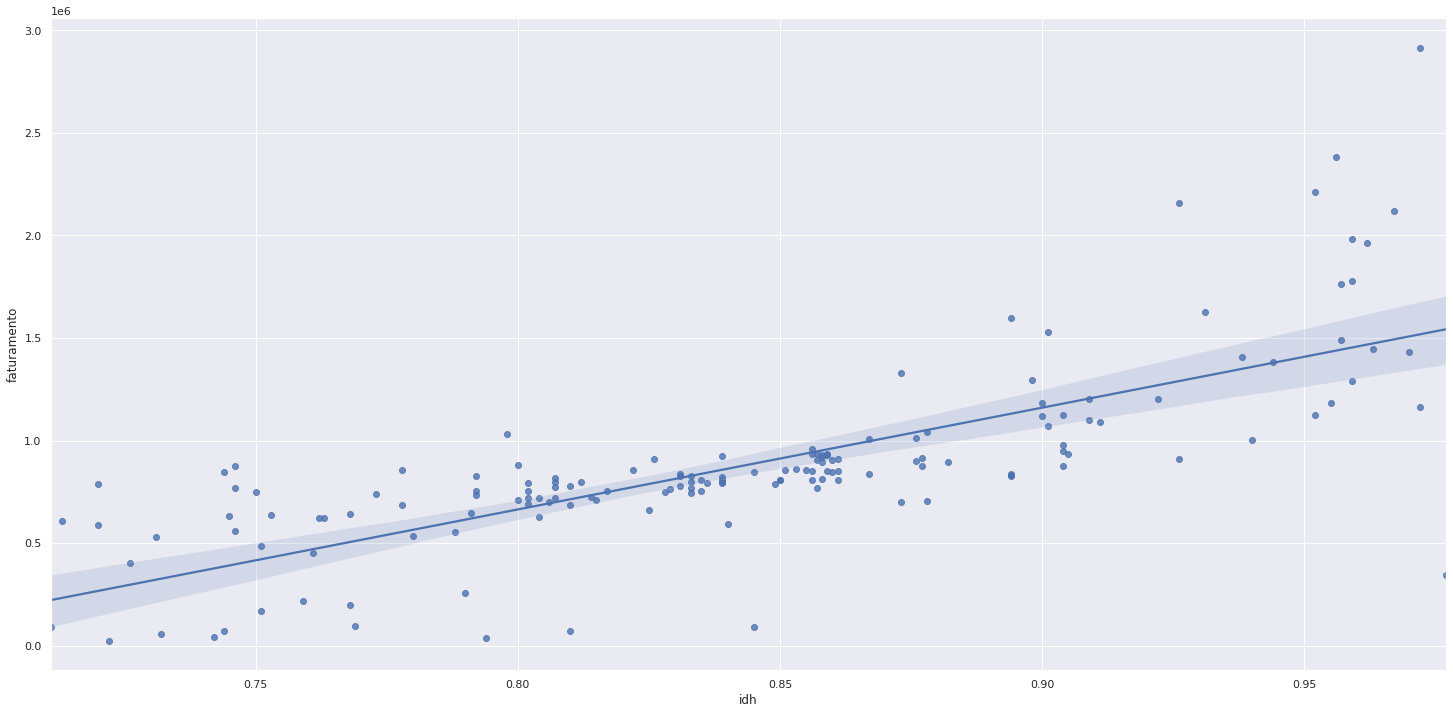

In [202]:
sns.regplot(x=df_3['idh'], y=df_3['faturamento'])

<AxesSubplot:>

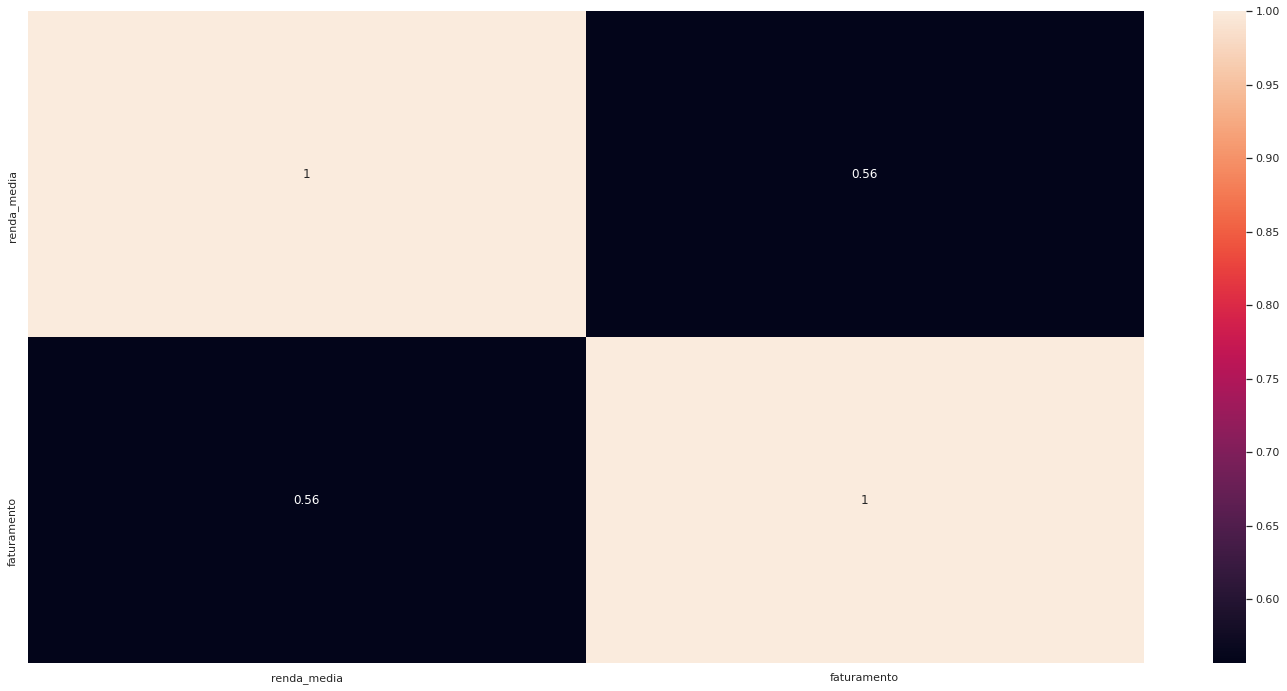

In [206]:
sns.heatmap(df_3[['renda_media', 'faturamento']].corr(), annot=True)